In [1]:
import sys
sys.path.append('/Users/shayneufeld/GitHub/mouse_bandit/data_preprocessing_code')
sys.path.append('/Users/shayneufeld/GitHub/mouse_bandit')
import support_functions as sf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy as sp
import bandit_preprocessing as bp
import sklearn.linear_model
from sklearn import discriminant_analysis
from sklearn import cross_validation
from sklearn import tree as Tree
from sklearn import ensemble
from IPython.display import Image
from sklearn.externals.six import StringIO
import pydotplus
import sklearn.tree
%matplotlib inline 

/Users/shayneufeld/anaconda/envs/cagrin/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Load in trial data and convert into switches

### (Drop current trial duration)

In [4]:
data = pd.read_csv('/Users/shayneufeld/GitHub/mouse_bandit/data/80_20_processed_data/new_master_8020_df.csv',index_col=0)
data = data.drop('0_trialDuration',axis=1)

switches = np.abs(np.diff(data['Decision'].values))
data = data.iloc[1:,:]
data['Decision'] = switches
data.head(4)

,Previous_10_Left_Choice,Previous_10_Right_Choice,Previous_10_Left_Reward,Previous_10_Right_Reward,Streak,5_Port,5_Reward,5_ITI,5_trialDuration,4_Port,...,2_Port,2_Reward,2_ITI,2_trialDuration,1_Port,1_Reward,1_ITI,1_trialDuration,0_ITI,Decision
1,10.0,0.0,7.0,0.0,-2.0,1.0,1.0,2.405,0.463,1.0,...,1.0,0.0,2.133,0.482,1.0,0.0,1.411,0.435,2.169,1.0
2,9.0,1.0,6.0,0.0,-3.0,1.0,1.0,2.379,0.367,1.0,...,1.0,0.0,1.411,0.435,0.0,0.0,2.169,0.395,3.838,0.0
3,8.0,2.0,5.0,0.0,-4.0,1.0,1.0,2.234,0.325,1.0,...,0.0,0.0,2.169,0.395,0.0,0.0,3.838,0.469,1.846,1.0
4,8.0,2.0,5.0,0.0,1.0,1.0,0.0,2.133,0.482,1.0,...,0.0,0.0,3.838,0.469,1.0,1.0,1.846,0.378,1.527,0.0


In [7]:
#extract features and decisions
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [8]:
#split into training and testing
n_trials = x.shape[0]
shuf_inds = np.random.permutation(n_trials)
split_ind = int(n_trials*0.7)

x_train = x[shuf_inds[:split_ind],:]
y_train = y[shuf_inds[:split_ind]]

x_test = x[shuf_inds[split_ind:],:]
y_test = y[shuf_inds[split_ind:]]

In [93]:
logreg = sklearn.linear_model.LogisticRegressionCV(Cs=50,penalty='l2')
logreg.fit(x_train,y_train)
y_predict = logreg.predict(x_test)
score = logreg.score(x_test,y_test)
score

0.95104895104895104

In [22]:
coefs[0].shape[0]

27

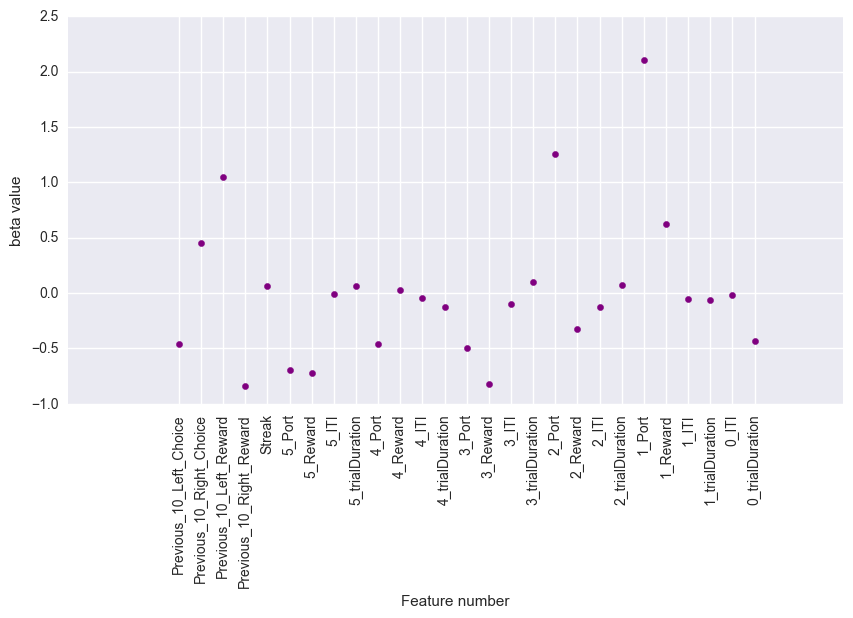

In [57]:
coefs = logreg.coef_
plt.figure(figsize=(10,5))
plt.scatter(np.arange(coefs[0].shape[0]),coefs[0],color='purple')
plt.xticks(np.arange(coefs[0].shape[0]),feature_names,rotation='vertical')
plt.ylabel('beta value')
plt.xlabel('Feature number')

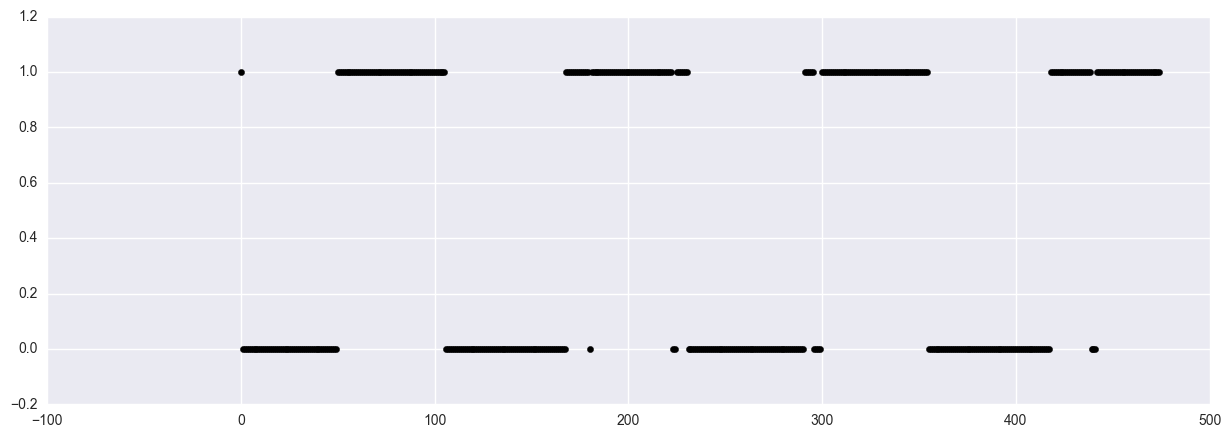

In [58]:
plt.figure(figsize=(15,5))
plt.scatter(np.arange(n_trials),y,color='black')


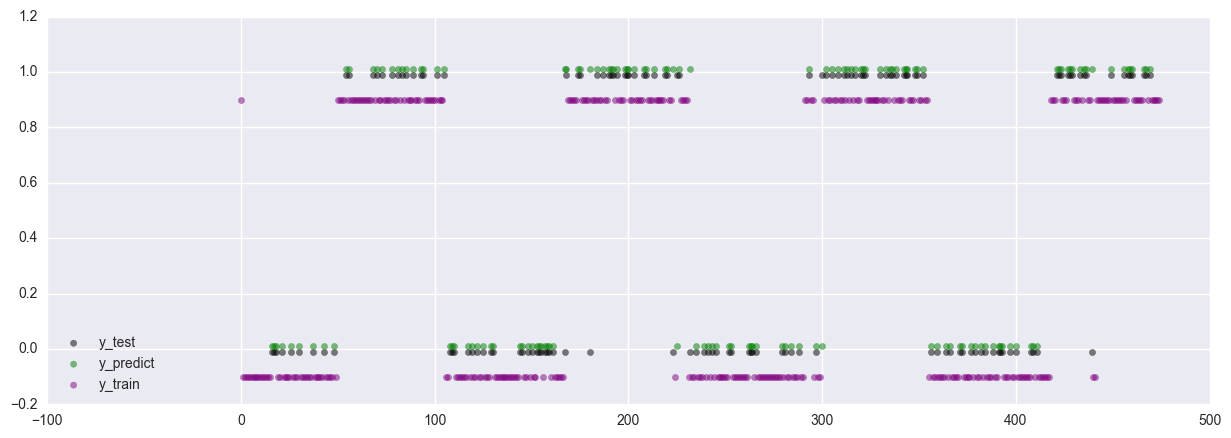

In [70]:
plt.figure(figsize=(15,5))
plt.scatter(shuf_inds[split_ind:],y_test-0.01,color='black',label='y_test',alpha=0.5)
plt.scatter(shuf_inds[split_ind:],y_predict+0.01,color='green',label='y_predict',alpha=0.5)
plt.scatter(shuf_inds[:split_ind],y_train-0.1,color='purple',label='y_train',alpha=0.5)
plt.legend(loc='lower left')

## Try taking out previous port decision

In [78]:
df_mod = df.drop('1_Port',axis=1)
df_mod.head(5)

,Previous_10_Left_Choice,Previous_10_Right_Choice,Previous_10_Left_Reward,Previous_10_Right_Reward,Streak,5_Port,5_Reward,5_ITI,5_trialDuration,4_Port,...,2_Port,2_Reward,2_ITI,2_trialDuration,1_Reward,1_ITI,1_trialDuration,0_ITI,0_trialDuration,Decision
0,1.0,9.0,0.0,9.0,1.0,0.0,1.0,2.380,0.573,0.0,...,1.0,0.0,3.898,0.582,1.0,10.666,0.688,1.650,0.428,1.0
1,2.0,8.0,0.0,8.0,-1.0,0.0,1.0,2.240,0.274,0.0,...,0.0,1.0,10.666,0.688,0.0,1.650,0.428,1.421,0.481,0.0
2,2.0,8.0,0.0,8.0,1.0,0.0,1.0,2.083,0.315,1.0,...,1.0,0.0,1.650,0.428,1.0,1.421,0.481,2.850,0.373,0.0
3,2.0,8.0,0.0,8.0,2.0,1.0,0.0,3.898,0.582,0.0,...,0.0,1.0,1.421,0.481,1.0,2.850,0.373,3.563,0.394,0.0
4,2.0,8.0,0.0,8.0,3.0,0.0,1.0,10.666,0.688,1.0,...,0.0,1.0,2.850,0.373,1.0,3.563,0.394,2.821,0.390,0.0


In [126]:
#extract features and decisions
x = df.iloc[:,5:-1].values
y = df.iloc[:,-1].values

In [127]:
#split into training and testing
n_trials = x.shape[0]
shuf_inds = np.random.permutation(n_trials)
split_ind = int(n_trials*0.7)

x_train = x[shuf_inds[:split_ind],:]
y_train = y[shuf_inds[:split_ind]]

x_test = x[shuf_inds[split_ind:],:]
y_test = y[shuf_inds[split_ind:]]

In [115]:
x_train.shape

(332,)

In [128]:
logreg = sklearn.linear_model.LogisticRegression()
logreg.fit(x_train,y_train)
y_predict = logreg.predict(x_test)
score = logreg.score(x_test,y_test)
score

0.94405594405594406

In [84]:
coefs.shape

(1, 26)

In [89]:
df_mod.columns.values

array(['Previous_10_Left_Choice', 'Previous_10_Right_Choice',
       'Previous_10_Left_Reward', 'Previous_10_Right_Reward', 'Streak',
       '5_Port', '5_Reward', '5_ITI', '5_trialDuration', '4_Port',
       '4_Reward', '4_ITI', '4_trialDuration', '3_Port', '3_Reward',
       '3_ITI', '3_trialDuration', '2_Port', '2_Reward', '2_ITI',
       '2_trialDuration', '1_Reward', '1_ITI', '1_trialDuration', '0_ITI',
       '0_trialDuration', 'Decision'], dtype=object)

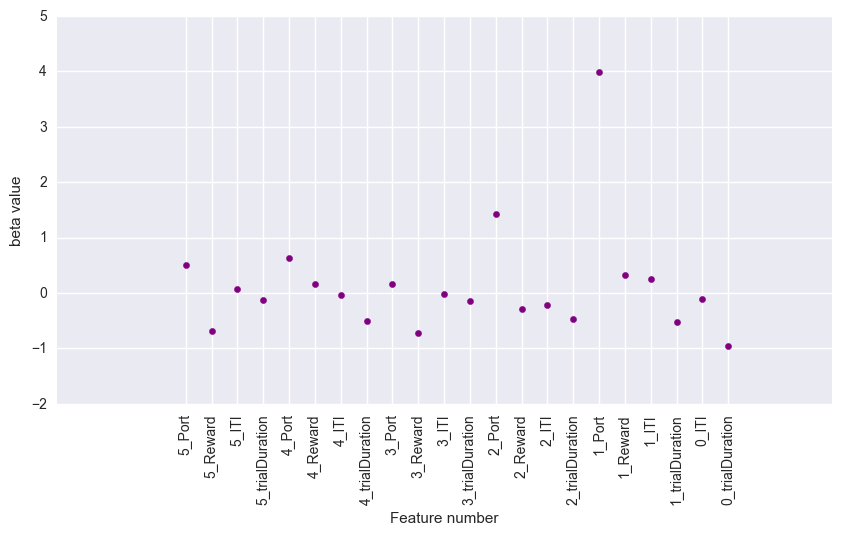

In [130]:
coefs = logreg.coef_
plt.figure(figsize=(10,5))
plt.scatter(np.arange(coefs[0].shape[0]),coefs[0],color='purple')
plt.xticks(np.arange(coefs[0].shape[0]),df.iloc[:,5:-1].columns.values,rotation='vertical')
plt.ylabel('beta value')
plt.xlabel('Feature number')

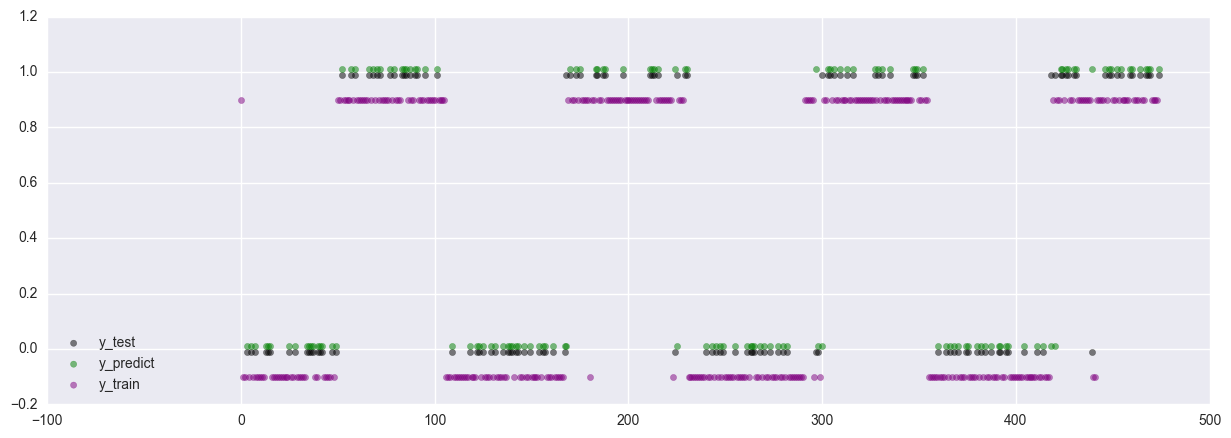

In [131]:
plt.figure(figsize=(15,5))
plt.scatter(shuf_inds[split_ind:],y_test-0.01,color='black',label='y_test',alpha=0.5)
plt.scatter(shuf_inds[split_ind:],y_predict+0.01,color='green',label='y_predict',alpha=0.5)
plt.scatter(shuf_inds[:split_ind],y_train-0.1,color='purple',label='y_train',alpha=0.5)
plt.legend(loc='lower left')

# Try only using inter-trial-intervals

In [145]:
df_events = df[['5_trialDuration','4_trialDuration','3_trialDuration','2_trialDuration','1_trialDuration','Decision']]
df_events.head(5)

,5_trialDuration,4_trialDuration,3_trialDuration,2_trialDuration,1_trialDuration,Decision
0,0.573,0.274,0.315,0.582,0.688,1.0
1,0.274,0.315,0.582,0.688,0.428,0.0
2,0.315,0.582,0.688,0.428,0.481,0.0
3,0.582,0.688,0.428,0.481,0.373,0.0
4,0.688,0.428,0.481,0.373,0.394,0.0


In [146]:
#extract features and decisions
x = df_events.iloc[:,:-1].values
y = df_events.iloc[:,-1].values

In [151]:
#split into training and testing
n_trials = x.shape[0]
shuf_inds = np.random.permutation(n_trials)
split_ind = int(n_trials*0.7)

x_train = x[shuf_inds[:split_ind],:]
y_train = y[shuf_inds[:split_ind]]

x_test = x[shuf_inds[split_ind:],:]
y_test = y[shuf_inds[split_ind:]]

In [152]:
logreg = sklearn.linear_model.LogisticRegression()
logreg.fit(x_train,y_train)
y_predict = logreg.predict(x_test)
score = logreg.score(x_test,y_test)
score

0.52447552447552448

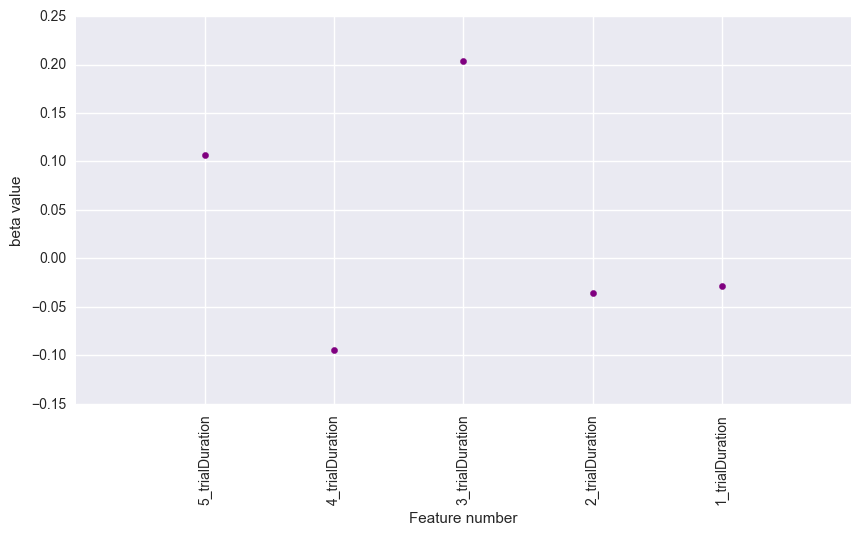

In [153]:
coefs = logreg.coef_
plt.figure(figsize=(10,5))
plt.scatter(np.arange(coefs[0].shape[0]),coefs[0],color='purple')
plt.xticks(np.arange(coefs[0].shape[0]),df_events.iloc[:,:-1].columns.values,rotation='vertical')
plt.ylabel('beta value')
plt.xlabel('Feature number')

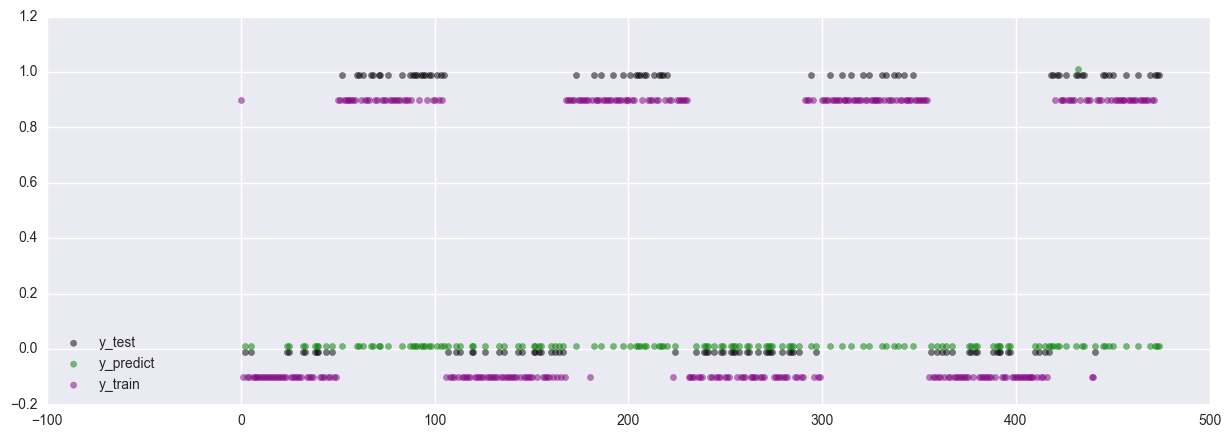

In [154]:
plt.figure(figsize=(15,5))
plt.scatter(shuf_inds[split_ind:],y_test-0.01,color='black',label='y_test',alpha=0.5)
plt.scatter(shuf_inds[split_ind:],y_predict+0.01,color='green',label='y_predict',alpha=0.5)
plt.scatter(shuf_inds[:split_ind],y_train-0.1,color='purple',label='y_train',alpha=0.5)
plt.legend(loc='lower left')

Quick notes since we did this all a little hastily:

    1) summary data good enough to get ~95% accuracy which was comparable to using all features
    2) streak, ITI, trialDuration by themselves did not perform better than chance
    3) taking out trial -1 Port did not affect model even though it had highest beta coefficient
    4) only using past 5 trials good enough for 95% accuracy with trial -1,-2 port decisions the highest betas